In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file = 'Position_Salaries'

dataset = pd.read_csv('P14-Part2-Regression/' + file + '.csv')

X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [37]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, Y)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [38]:
p = LinearRegression()
p.fit(X_poly, Y)
p

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

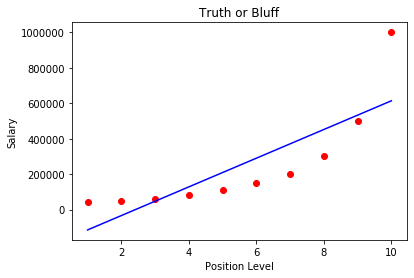

In [39]:
plt.scatter(X, Y, color= 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

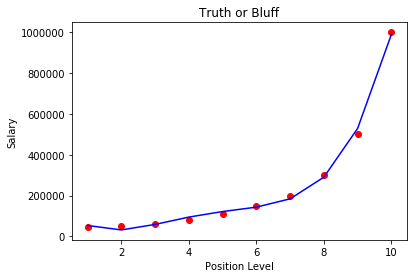

In [40]:
x_grid = np.arange(min(X), max(X), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X, Y, color= 'red')
plt.plot(X, p.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [44]:
r = p.predict(poly_reg.fit_transform(np.array([6.5]).reshape(1, 1)))
r

array([158862.45265153])